In [ ]:
'''
Alejandro Fernández Trigo
'''

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Imágenes del Landsat C (RGB + NIR) (repositorio)
R = cv.imread('img/Landsat_C_04-11_R.png',cv.IMREAD_GRAYSCALE)
G = cv.imread('img/Landsat_C_03-11_G.png',cv.IMREAD_GRAYSCALE)
B = cv.imread('img/Landsat_C_02-11_B.png',cv.IMREAD_GRAYSCALE)
NIR = cv.imread('img/Landsat_C_05-11_NIR.png',cv.IMREAD_GRAYSCALE)

In [43]:
# El enunciado pide reutilizar el contenido de la práctica II.
# Función corte de la práctica II Ejercicio 3:
def corte(imagen, porcentaje):
    # Copia la imagen y calcula el histograma con OpenCV
    resultado = imagen.copy()
    hist = cv.calcHist([imagen], [0], None, [256], [0, 256])
        
    # Calculamos el nº de píxeles que quedan fuera en base al porcentaje:        
    pixeles = imagen.size
    total = pixeles * porcentaje
    valores = list(hist)
    
    n = 0
    # Recorrer el histograma para calcular Cmin:
    for i in range(1,256):
        n += valores[i]
        if n > total:
            cmin = i
            break
    
    n = 0
    # Recorrer el histograma para calcular Cmax:
    for i in range(255,0,-1):
        n += valores[i]
        if n > total:
            cmax = i
            break
    
    for i in range(resultado.shape[0]):
        for j in range(resultado.shape[1]):
            # ND0 = 0 si ND ≤ NDcortemin
            if resultado[i][j] < cmin:
                resultado[i][j] = 0
            # ND0 = 255 si ND ≥ NDcortemax
            elif resultado[i][j] > cmax:
                resultado[i][j] = 255
            else:
                # ND0ij = ND0min + (NDij − NDcortemin)·(ND0max − ND0min)/(NDcortemax − NDcortemin)
                resultado[i][j] = (0 + (imagen[i][j] - cmin) * (255 - 0) / ((cmax - cmin)))
    
    return resultado

In [4]:
# Función falso
def falso(banda1, banda2, banda3):
    # La librería de OpenCV permite "mergear" la entrada de las tres imágenes
    return cv.merge((banda1,banda2,banda3))

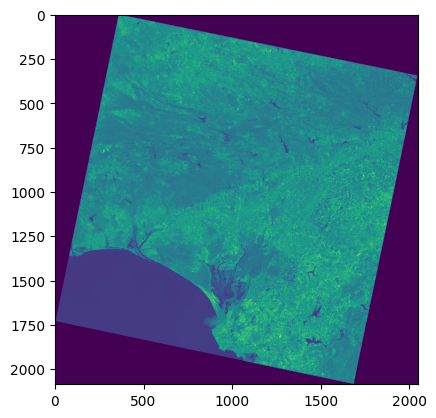

In [31]:
# Imágenes de entrada: comentar/descomentar porque no se pueden ejecutar varios imshow en la misma casilla de un notebok!
plt.imshow(R)
plt.imshow(G)
plt.imshow(B)
plt.imshow(NIR)

True

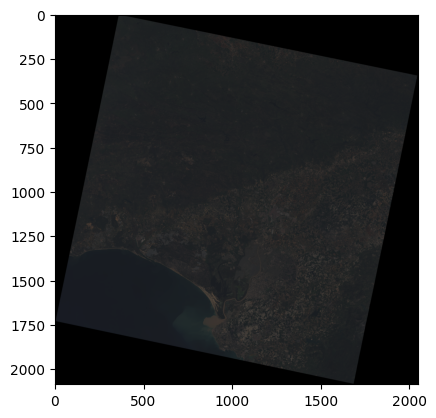

In [23]:
# Color verdadero: 
color_verdadero = falso(R, G, B)
plt.imshow(color_verdadero)
cv.imwrite("salida/1_ColorVerdadero.jpg", color_verdadero)

In [22]:
# Falso color: metemos NIR; dependiendo de la posición resaltamos una u otra banda!!!
falso_color_R = falso(NIR, G, B)
falso_color_G = falso(R, NIR, B)
falso_color_B = falso(R, G, NIR)

True

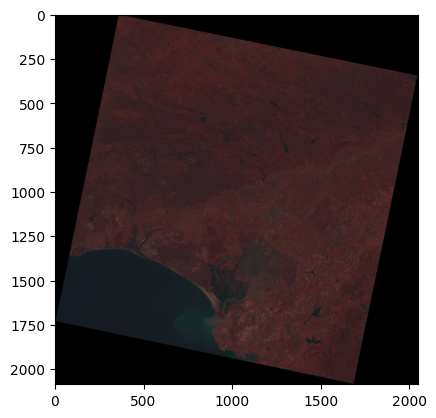

In [24]:
# Falso color destacando el rojo:
plt.imshow(falso_color_R)
cv.imwrite("salida/1_FalsoColorRojo.jpg", falso_color_R)

True

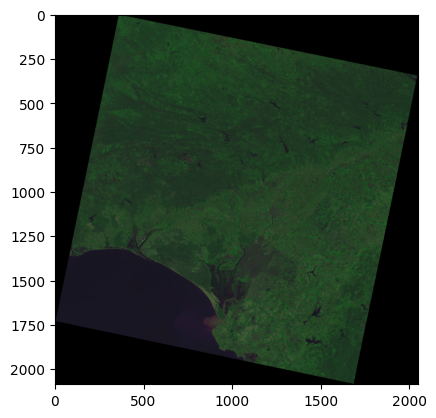

In [26]:
# Falso color destacando el verde:
plt.imshow(falso_color_G)
cv.imwrite("salida/1_FalsoColorVerde.jpg", falso_color_G)

True

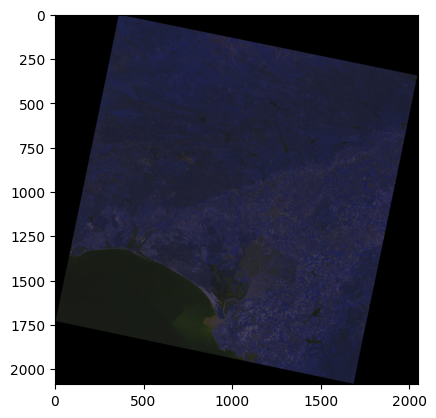

In [27]:
# Falso color destacando el azul:
plt.imshow(falso_color_B)
cv.imwrite("salida/1_FalsoColorAzul.jpg", falso_color_B)

In [44]:
# Corte de colas del 1% aplicado a cada caso anterior:
# Llamamos a la función para cada banda: esto tarda un poco
corte_R = corte(R, 0.01)
corte_G = corte(G, 0.01)
corte_B = corte(B, 0.01)
corte_NIR = corte(NIR, 0.01)

True

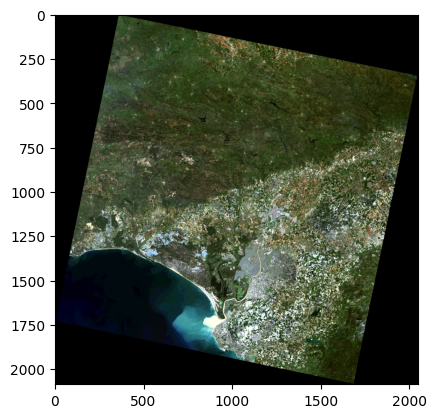

In [45]:
# Con el corte de colas calculado, representamos los casos anteriores:
# Color verdadero: 
color_verdadero_cortado = falso(corte_R, corte_G, corte_B)
plt.imshow(color_verdadero_cortado)
cv.imwrite("salida/1_ColorVerdaderoCortado.jpg", color_verdadero_cortado)

True

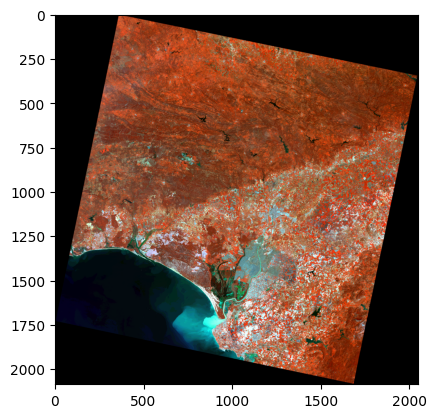

In [46]:
# Falso color: metemos NIR; dependiendo de la posición resaltamos una u otra banda!!!
# Falso color destacando el rojo:
falso_color_R_cortado = falso(corte_NIR, corte_G, corte_B)
plt.imshow(falso_color_R_cortado)
cv.imwrite("salida/1_FalsoColorRojoCortado.jpg", falso_color_R_cortado)

True

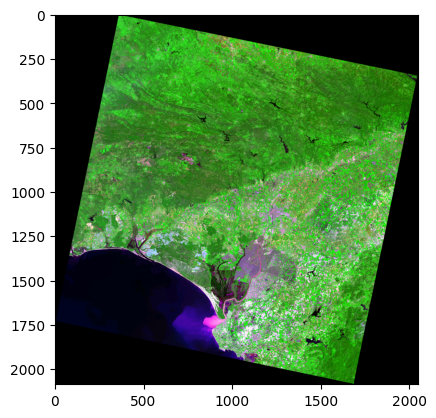

In [47]:
# Falso color: metemos NIR; dependiendo de la posición resaltamos una u otra banda!!!
# Falso color destacando el verde:
falso_color_G_cortado = falso(corte_R, corte_NIR, corte_B)
plt.imshow(falso_color_G_cortado)
cv.imwrite("salida/1_FalsoColorVerdeCortado.jpg", falso_color_G_cortado)

True

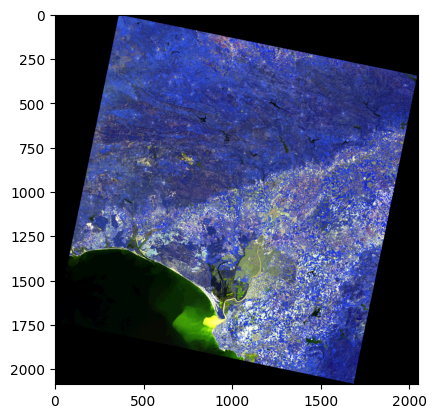

In [48]:
# Falso color: metemos NIR; dependiendo de la posición resaltamos una u otra banda!!!
# Falso color destacando el azul:
falso_color_B_cortado = falso(corte_R, corte_G, corte_NIR)
plt.imshow(falso_color_B_cortado)
cv.imwrite("salida/1_FalsoColorAzulCortado.jpg", falso_color_B_cortado)